<a href="https://colab.research.google.com/github/internship-bvoc2020/data-analysis/blob/master/DataAnalysis2_Plots%26Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import data and basic File overview**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_store = pd.read_csv("Salesstore.csv",sep="\t")

In [11]:
df_store.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [23]:
df_store.shape

(730, 13)

In [12]:
df_store.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


### **Continous Variables vs Categorical Variables**

**Continuous variables** are numeric variables that have an any number of values.A continuous variable can be numeric or date/time

Eg: In the above Salesstore dataset **Order_Quantity , Sales , Profit** are fields which are examples of Continous variables

Usually identified by Unique number of finite values taken or Knowledge of the field/variable 

**Categorical Variable** also called a nominal variable is one that has two or more categories (finite small set),without any ordering.It can be numeric or string type.

Eg: In Salesstore dataset **Order_Priority , Ship_Mode** are examples of Categorical variable.

Usually identified as they tend to take a large number of values ( upto number of unique records present) and strictly numeric or decimal

**Categorical Variables in the Dataset**


In [13]:
#Unique Priority of Orders
df_store['Order_Priority'].unique()

array(['High', 'Not Specified', 'Low', 'Medium', 'Critical'], dtype=object)

In [14]:
#Various Shipping modes
df_store['Ship_Mode'].unique()

array(['Express Air', 'Regular Air'], dtype=object)

In [16]:
#Different Regions where sales occured 
df_store["Region"].unique()

array(['Nunavut', 'Northwest Territories', 'Atlantic', 'West', 'Ontario',
       'Prarie'], dtype=object)

In [18]:
#Various Customer Segments
df_store['Customer_Segment'].unique()

array(['Corporate', 'Consumer', 'Home Office', 'Small Business'],
      dtype=object)

In [19]:
#Various Product Categories 
df_store['Product_Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [20]:
#Product Containers information
df_store['Product_Container'].unique()

array(['Large Box', 'Medium Box', 'Small Box'], dtype=object)

**Continous Variables in dataset**

In [22]:
len(df_store['Sales'].unique())

729

In [24]:
len(df_store['Order_Quantity'].unique())

50

### **Plots**

**Seaborn FacetGrid** : takes the given data onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset

For more details refer : 
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

**Histogram plot**:A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin

**Scatter Plot** :To visualize a bivariate ( 2 variables) distribution , themost effective way is a scatterplot, where each observation is shown with point at the x and y values

For more details refer: https://seaborn.pydata.org/tutorial/distributions.html


### **Univariate Analysis**

Analyzing data with only one variable. It doesn't deal with causes or relationships  and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data

Plots used are Histograms , Line Chart , Bar Chart (usually with Categorical Data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86d1c4e4e0>,
      dtype=object)

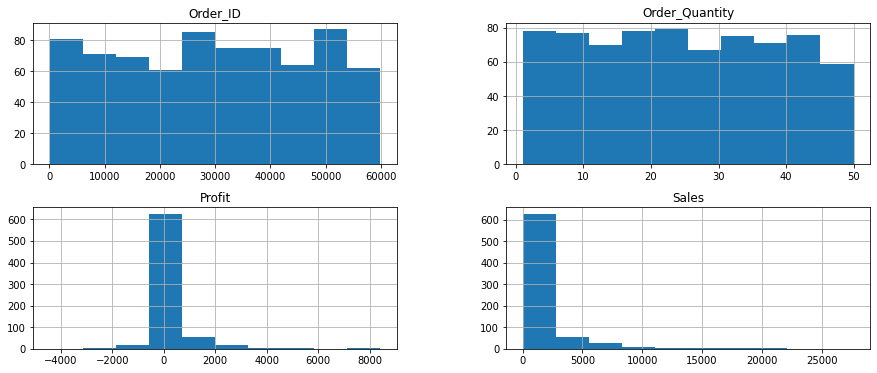

In [55]:
#Takes all numerical data (continous or categorical) and plots
df_store.hist(figsize=[15,6])

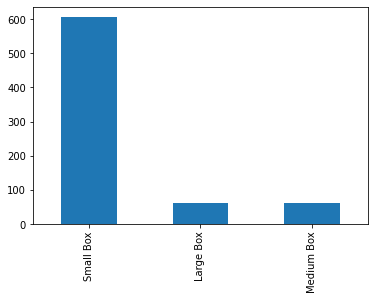

In [64]:
df_store['Product_Container'].value_counts().plot.bar()

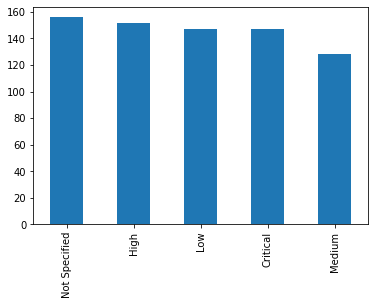

In [58]:
df_store['Order_Priority'].value_counts().plot.bar()

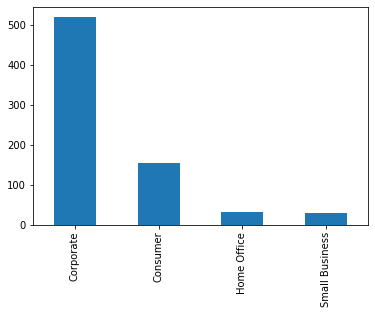

In [65]:
df_store['Customer_Segment'].value_counts().plot.bar()

### **Bivariate Analysis**

Bivariate analysis is the simultaneous analysis of two variables (columns/fields). Evaluates the relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences

***Determining Profit pattern w.r.t Sales***

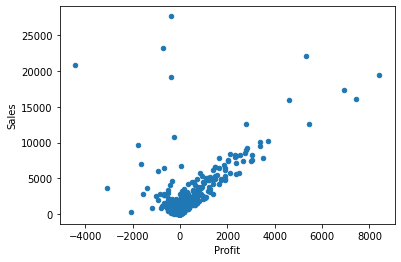

In [66]:
df_store.plot.scatter(x='Profit', y='Sales')

*Inference drawn from above plot*

1.  There appears to be equal loss and profit for Sales of amount < 5000  
2.  Overall trend of Profit appears positive for Sale amount > 5000 with some outlier (exception) cases 


***Showcasing sales across various Regions***

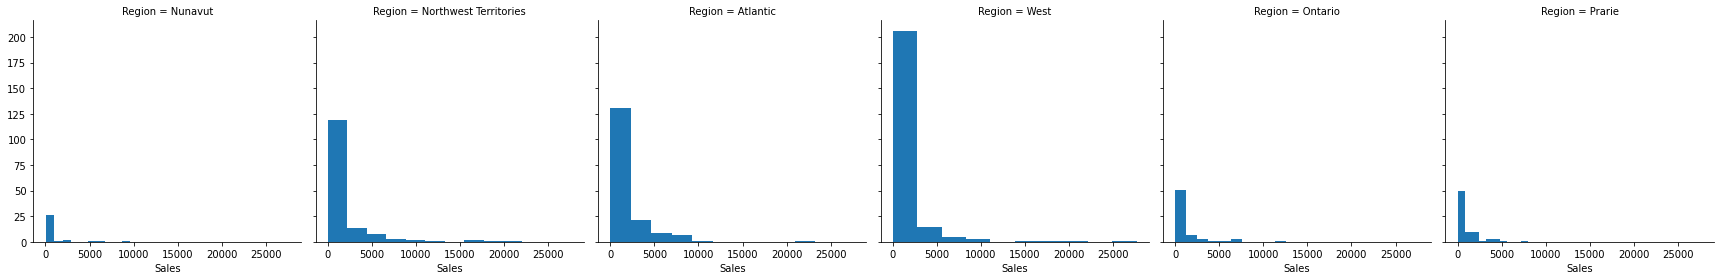

In [38]:
fn = sns.FacetGrid(df_store,col='Region',height=4, aspect=1)
fn = fn.map(plt.hist,"Sales")


*Inference drawn from above plot*

1.  Region West has maximum number sales  
2.  Majority of the sales volume is under 15,000 for all regions 




***Showcasing Sales across all the Shipping modes and the Product Containers used***

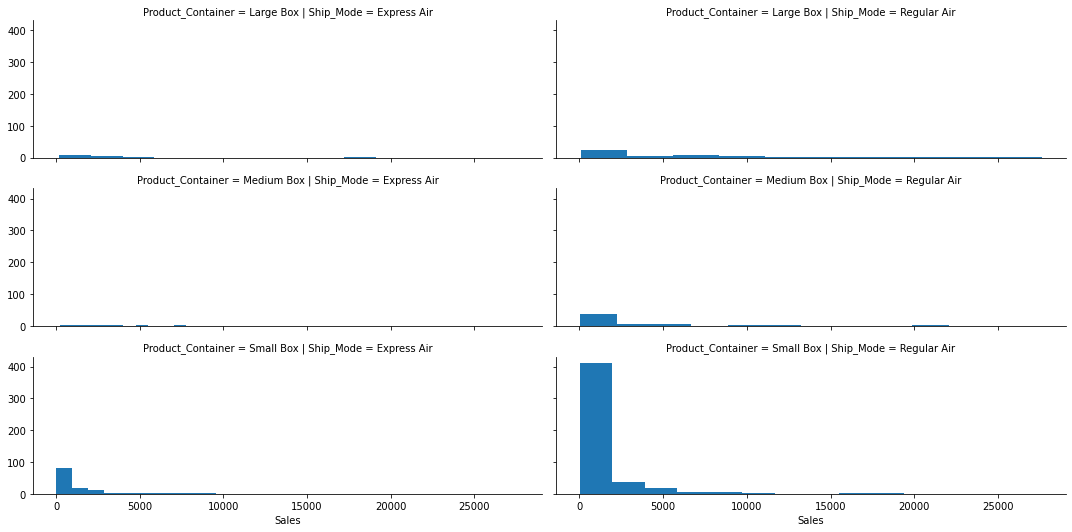

In [57]:
fn =sns.FacetGrid(df_store,col='Ship_Mode',row='Product_Container',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=3)
fn = fn.map(plt.hist,"Sales")

*Inference drawn from above plot*

1.  No of Sales are maximum for Small box container and shipped via Regular Air  
2.  Regular Air has higher Sales compared to Express Air mode for all Product Container types

Question :Is the Product Container & Ship Mode same for maximum number of Sales & the highest Sales amount ?

In [44]:
df_store[ (df_store['Ship_Mode'] == 'Regular Air')].groupby(['Product_Container','Ship_Mode'])[['Sales']].count()

,,Sales
Product_Container,Ship_Mode,
Large Box,Regular Air,47
Medium Box,Regular Air,51
Small Box,Regular Air,481


In [45]:
df_store[ (df_store['Ship_Mode'] == 'Regular Air')].groupby(['Product_Container','Ship_Mode'])[['Sales']].sum()

,,Sales
Product_Container,Ship_Mode,
Large Box,Regular Air,252828.8800
Medium Box,Regular Air,107724.2475
Small Box,Regular Air,493742.9840


***Keeping Profit and Sales as the baseline and analyzing the pattern shown by different Product Category across various Customer Segments***

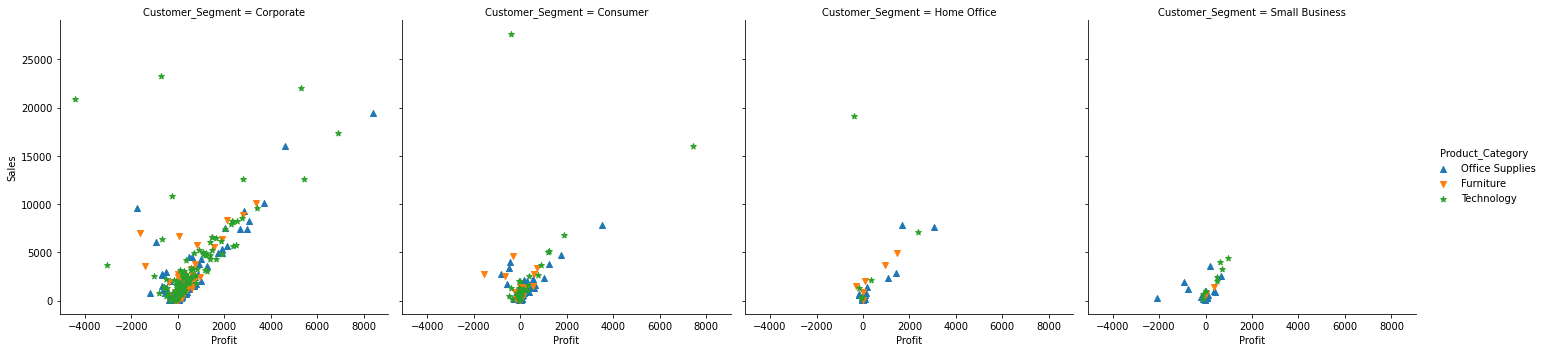

In [48]:
fn = sns.FacetGrid(df_store,col='Customer_Segment',hue='Product_Category',hue_kws=dict(marker=["^", "v","*"]),height=5)
fn = (fn.map(plt.scatter,"Profit","Sales").add_legend())

*Some Inferences drawn from above plot*


1.   Maximum Products sold for Customer Segment Corporate ,Mimimum for Small Business
2.   Product Category Technology is sold the most for Corporate & Consumer Customer Segment
3.   Positive trend of Sales to Profit ( More Sales , More profit)  in Corporate Segment



